# THE KRUGMAN MODEL OF INTERNATIONAL TRADE

In [62]:
# Import relevant modules

import numpy as np
from scipy import optimize
import sympy as sm
from sympy import Function
from types import SimpleNamespace
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules
from krugmanclass import KrugmanModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

[The following specification of the Krugman model is based on the exam of International Economics of June 2022]

The Krugman model is an international trade model developed in 1979. The previous trade models were based on comparative advantage or difference in factor endowments between countries. However, those models could not give explanations to some empirical facts, like intense trade between countries aligned in terms of technologies and endowments. 
Krugman model takes this issue into account, including in the assumptions also the Increasing Return to scale (IRS).

The model is based on the monopolistic competiton model of Dixit and Stiglitz (1977). 

**ASSUMPTIONS**

Supply side: 
* N firms, with N large 
* each firm produces a differentiate product *i* whose price is $p_i$ with a similar technology
* absence of barriers to entry and exit
* IRS, modelled with a fixed cost (labour)
* no trade costs 

Demand side:
* consumers prefer differentiation of products
* there are L consumers that are also workers

Since firms produce differentiated products, they can act as monopolists of their variety, setting prices freely, and gaining positive profits. This surplus attracts other firms in the economy, facilitated by the absence of barriers to entry. This process leads to the transition from monopoly to perfect competition, characterised by null profits and no incentives to other firms to entry.

**PROCEDURE TO SOLVE THE MODEL** 
1. Analyze the consumer maximization problem to find the elasticity of demand
2. Analyze the firm maximization problem to derive the optimal pricing strategy for the firm in monopoly (which will be the curve PP)
3. Impose the zero profit condition in the long run due to the entry of many firms, that will result in the ZZ curve
4. Find optimal markup and consumption at the equilibrium between the curves
5. Find the number of firms at the equilibrium 


**EQUILIBRIUM EQUATIONS**
* Firm maximize profits in monopoly: MR (marginal revenue) = MC (marginal cost)
* zero profit in the long run: P (price) = AC (average cost)
* labour market clearing condition: $L = \sum_{i=1}^N L_i  $
* goods market clearing condition: $y_i = L c_i$

Note: The equilibrium is symmetric, so at the equilibrium all firms charge the same price $p_i = p$ and produce the same output $y_i = y$. 

**CONSUMERS**

$$U = \sum_{i=1}^N \left(\gamma c_i + c_i ^{\frac{\sigma - 1}{\sigma}}\right)$$

**MAXIMIZATION OF REPRESENTATIVE CONSUMER'S UTILITY FUNCTION**

The maximization of the representative consumer's utility function requires that total expenditure is equal to total income.

To solve the consumer problem, we set the Lagrangian

$$\max_{c_i}\sum_{i=1}^N \left(\gamma c_i + c_i^\frac{\sigma-1}{\sigma}\right) - \lambda \sum_{i=1}^N (c_i p_i - w)$$

Deriving this function with respect to the consumption for each consumer, we obtain the following first order conditions (FOCs):

$$\gamma + \frac{\sigma-1}{\sigma} c_i^{-\frac{1}{\sigma}} = \lambda p_i \quad \forall i = 1,\dots,N$$


It is important to notice how $c_{i}$ is function of $p_{i}$.

We then solve for $\frac{dc_i}{dp_i}\frac{p}{c_i}$

and we obtain: 

$$\frac{\partial c_i}{\partial p_i} \frac{p_i}{c_i} = -\sigma \frac{\gamma c_i^\frac{1}{\sigma} + \frac{\sigma-1}{\sigma}}{\frac{\sigma-1}{\sigma}}$$

It is possible to define the price elasticity of demand $\epsilon(c_{i}) \equiv -\frac{\partial c_i}{\partial p_i} \frac{p_i}{c_i} = \sigma \frac{\gamma c_i^\frac{1}{\sigma} + \frac{\sigma-1}{\sigma}}{\frac{\sigma-1}{\sigma}}$ .


**PRODUCERS**

Production technology: input used is only labour, with a fixed cost: $L_i = \alpha + \beta y_i$. 

**MAXIMIZATION OF FIRM'S PROFIT FUNCTION**

The i-th firm's profit function is given by:
$$\pi_i = p_i y_i - L_i w$$

Each firm maximize its profit with respect to the price charged:

$$\max_{p_i} p_i y_i - (\alpha + \beta y_i)w$$

Since $y_i=L_i c_i (p_i)$ is the demand curve that the firm faces, it is possible to obtain an unconstrained mazimization problem:

$$\max_{p_i} p_i y_i - (\alpha + \beta L_i c_i(p_i))w$$

which has the following FOCs:

$$\frac{\partial \pi_i}{\partial p_i} = 0$$

$$L c_i(p_i) + p_i L \frac{\partial c_i(p_i)}{\partial p_i} - \beta w L \frac{\partial c_i(p_i)}{\partial p_i} = 0$$

$$c_i(p_i) + p_i \frac{\partial c_i(p_i)}{\partial p_i} - \beta w \frac{\partial c_i(p_i)}{\partial p_i} = 0$$

$$1 + \frac{1}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} (p_i - \beta w) = 0$$

$$ \frac{p_i}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} \left(1 - \frac{\beta w}{p_i}\right) = -1 $$

Since $\frac{p_i}{c_i(p_i)} \frac{\partial c_i(p_i)}{\partial p_i} = -\epsilon(c_{i})$:

$$\epsilon(c_{i}) \beta w = (-1 + \epsilon(c_{i}))p_i$$

$$p_i = \frac{\epsilon(c_{i})}{\epsilon(c_{i})-1} \beta w  $$  

where $\frac{\epsilon(c_{i})}{\epsilon(c_{i})-1}$ is the markup and $\beta w$ is the MC. The equation is the PP curve.

This is the optimal price strategy for the i-th firm.

As previously stated, the lack of barriers to entry and positive profits attract more and more enterprises into the market, and this leads to a state of perfect competition, with null profits for all the firms involved.

$$\pi_i =0$$
$$p_i y_i - w (\alpha + \beta y_i) = 0$$
$$ p_i = w \left(\frac{\alpha}{y_i} + \beta\right) $$  

which is the ZZ curve.

In a symmetric equilibrium, we must have:
1. All active firms produce the same, $y_i = y$.
2. All prices are identical, $p_i = p$.
3. All goods are demanded in the same quantity, $c_i = c$.
4. Output markets clear, such that production of a product equals total demand for that same product, $y_i = c_i L$.
5. Labor markets clear, $\sum_{i=1}^N (L_i)=L$.
6. All active firms set prices according to the optimal pricing rule.
7. No firms earn positive profits.

Given the seven points above, we can write the pricing condition and the zero profit condition as:
$$MR=MC : \frac{p}{w}=\frac{\epsilon(c)}{\epsilon(c)-1} \beta$$
$$p=AC: \frac{p}{w}=\frac{\alpha}{cL} +\beta$$
In the $\left(c,\frac{p}{w}\right)$ space, the first is upward-sloping and the second is downward-sloping. The equilibrium is determined by their intersection.
We assume $\gamma<0$ to obtain an upward sloping PP curve, and therefore an equilibrium unique and stable.

We now obtain the number of firms active in equilibrium as:
$$\underbrace{L=\sum_{i=1}^N(L_i)}_{\substack{\text{Labour market}\\\text{clearing}}}=\sum_{i=1}^N(\alpha+\beta y_i)=N(\alpha+\beta c L)$$

$$N=\frac{L}{\alpha+\beta c L}$$

Is is important to notice that for a given size of the labor force $L$, higher demand for a given product ($c \uparrow$) allows for fewer firms (and therefore profucts) active in equilibrium ($N \downarrow$).




## Numerical solution

In [63]:
model = KrugmanModelClass()

We proceed with the first step: solve the consumer problem to find the demand function. Since the problem is symmetric, we do it for a representative consumer.  

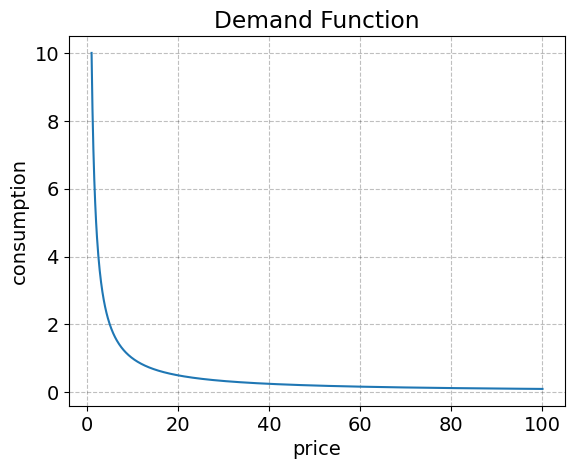

In [64]:
# prepare price grid 
p_grid = np.linspace(model.par.p_min,model.par.p_max,model.par.Np)

# obtain consumption function given the price grid 
consumption_function = np.empty(model.par.Np) 
for i,p in enumerate(p_grid):
    model.par.p = p 
    consumption_function[i] = model.solve_consumer()

# Interpolate values to create Demand Function
interp_func = interpolate.RegularGridInterpolator([p_grid], consumption_function,
                                                  bounds_error=False,
                                                  fill_value=None)


# Plot Demand Function
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(p_grid, interp_func)
axx.set_title('Demand Function')
axx.set_xlabel('price')
axx.set_ylabel('consumption');

## Analytical solution

The second step is to analyze the firm's problem of maximisation of profits as monopolist of the variety of the good. We do it analytically.

[For the peer feedback: we tried to solve the problem numerically, inserting the demand function in the profit maximization of firms. However, we did not obtain the right PP curve. Furthermore, we tried to calculate the elasticity geometrically but we do not obtain the right one too. We inserted our code in addition.ipynb. If you have suggestions regarding these problems, they are very much welcome! ]

In [65]:
# Define all symbols
pi = sm.symbols('p_i')
yi = sm.symbols('y_i') 
Li = sm.symbols('L_i')
w = sm.symbols('w')
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')
ci = sm.symbols('c_i')
L = sm.symbols('L')
cipi = Function('c')(pi)
eci = sm.symbols('epsilon (c_i)')

# Define profit function 
profit = pi*yi - Li*w 

# Define cost of labor
labour = alpha + beta*yi

# Substitue labour constraint in the profit function
profit_subs = profit.subs(Li, labour)

# Define market clearing constraint
quantity = L*cipi

# Substitue market clearing constraint
profit_subs2 = profit_subs.subs(yi, quantity)

# FOC 
foc = sm.diff(profit_subs2, pi)
foc2= foc/L
sim = sm.simplify(foc2)
eq = sm.Eq(0, sim)
eq

Eq(0, -beta*w*Derivative(c(p_i), p_i) + p_i*Derivative(c(p_i), p_i) + c(p_i))

From this expression the elasticity of demand respect to price can be isolated, obtaining the expression for the PP curve, for which we have created a function. 

In [66]:
# Calculate PP curve given the demand function
tr2 = model.pp(consumption_function)

## Numerical solution

Then we calculate the ZZ curve imposing the zero profit condition.

In [67]:
# Derive the zz curve
price2 = np.empty(model.par.Np) 
for i,c in enumerate(consumption_function):
   model.par.c = c
   price2[i] = model.solve_firm2()


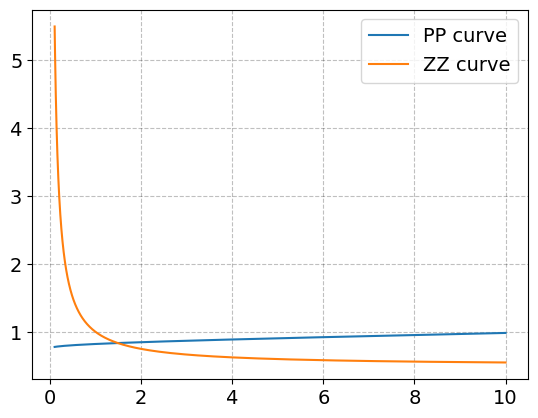

In [68]:
# Interpolate values to obtain the PP Function
interp_func1 = interpolate.RegularGridInterpolator([consumption_function], tr2/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)

# Interpolate values to obtain the ZZ Function
interp_func2 = interpolate.RegularGridInterpolator([consumption_function], price2/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)
fig = plt.figure()
axx = fig.add_subplot(1,1,1)
c_grid = interp_func(p_grid)
line1 = axx.plot(consumption_function, interp_func1(c_grid))
line2 = axx.plot(consumption_function, interp_func2(c_grid))
axx.legend(['PP curve', 'ZZ curve'])


Now we find the equilibrium in the economy.

In [69]:
# Obtain the difference between the two curves 
def eq(x):
   return interp_func1([x])-interp_func2([x])

# Find root of the difference i.e. equilibrium consumption
res = optimize.root_scalar(eq,bracket=[0.5,5])
c_eq = res.root
print(f'c* = {c_eq:.4f}')

# Find p/w at the equilibrium
pw_eq = interp_func1([res.root])
print('(p/w)* =', pw_eq)

# Find number of firms at equilibrium
N = model.number(c_eq)
print(f'n* = {N}')

c* = 1.4865
(p/w)* = [0.83637603]
n* = 1


# Further analysis: opening to trade

Since we assumed symmetry, opening to trade can be modeled as an increase in L, since the size of the economy increases. PP curve will not change, while ZZ curve will change. Let's assume that a country starts to trade with another country, so the size of the economy doubles.

c*_trade = 0.7919
(p/w)*_trade = [0.81572021]
n*_trade = 2


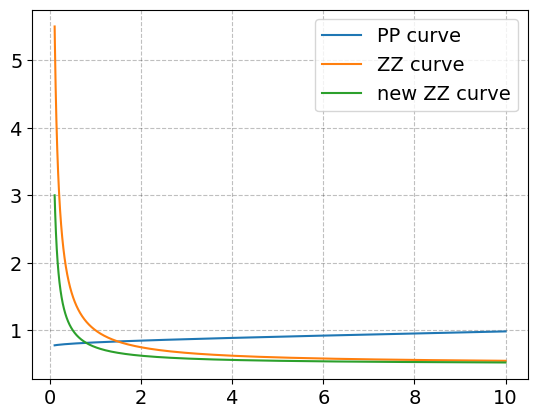

In [70]:
# Set new L 
model.par.L = model.par.L*2

# Calculate and plot the new ZZ curve
price3 = np.empty(model.par.Np) 
for i,c in enumerate(consumption_function):
   model.par.c = c
   price3[i] = model.solve_firm2()

interp_func3 = interpolate.RegularGridInterpolator([consumption_function], price3/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)


c_grid = interp_func(p_grid)

fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(consumption_function, interp_func1(c_grid))
axx.plot(consumption_function, interp_func2(c_grid))
axx.plot(consumption_function, interp_func3(c_grid))
axx.legend(['PP curve', 'ZZ curve', 'new ZZ curve'])

# Calculate new equilibrium

def eq(x):
   return interp_func1([x])-interp_func3([x])

res = optimize.root_scalar(eq,bracket=[0.5,5])
c_eq = res.root
pw_eq = interp_func1([res.root])
N = model.number(c_eq)
print(f'c*_trade = {c_eq:.4f}')
print('(p/w)*_trade =', pw_eq)
print(f'n*_trade = {N}')

The equilibrium consumption and price divided by income are lower than in the previous case, while the number of firms (therefore varietes) has increased. In fact, with the opening to trade, the consumers face more varietes and consume less of more varietes. 

## Extension

We now introduce a tax on production, that we can model with an increase in the marginal cost of production. This affects the firm's optimal pricing strategy and the zero profit condition and therefore the equilibrium outcome.

$$MR=MC : \frac{p}{w}=\frac{\epsilon(c)}{\epsilon(c)-1} \beta(1+t)$$
$$p=AC: \frac{p}{w}=\frac{\alpha}{cL} +\beta(1+t)$$


We now obtain the number of firms active in equilibrium as:
$$\underbrace{L=\sum_{i=1}^N(L_i)}_{\substack{\text{Labour market}\\\text{clearing}}}=\sum_{i=1}^N(\alpha+\beta(1+t) y_i)=N(\alpha+\beta(1+t) c L)$$

$$N=\frac{L}{\alpha+\beta(1+t) c L}$$

The introduction of taxes on production allowes for fewer firms active in equilibrium ($ t \rightarrow N\downarrow$)

c*_tax = 1.2615
(p/w)*_tax = [0.99636102]
n*_tax = 1


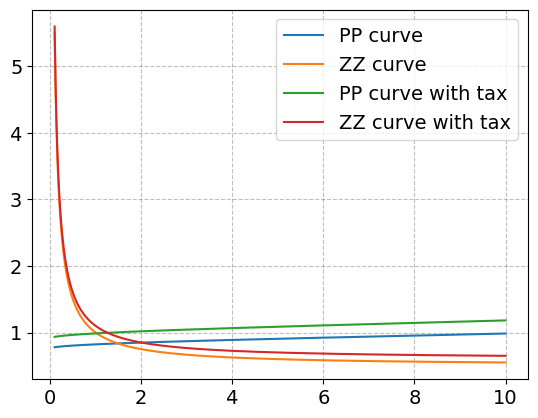

In [71]:
model.par.L = 1

# Calculate new PP function with the tax
tr3 = model.pp_tax(consumption_function)

interp_func4 = interpolate.RegularGridInterpolator([consumption_function], tr3/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)

# Calculate new ZZ function with the tax
price4 = np.empty(model.par.Np) 
for i,c in enumerate(consumption_function):
   model.par.c = c
   price4[i] = model.solve_firm2_tax()

interp_func5 = interpolate.RegularGridInterpolator([consumption_function], price4/model.par.w,
                                                  bounds_error=False,
                                                  fill_value=None)

c_grid = interp_func(p_grid)

fig = plt.figure()
axx = fig.add_subplot(1,1,1)
axx.plot(consumption_function, interp_func1(c_grid))
axx.plot(consumption_function, interp_func2(c_grid))
axx.plot(consumption_function, interp_func4(c_grid))
axx.plot(consumption_function, interp_func5(c_grid))
axx.legend(['PP curve','ZZ curve', 'PP curve with tax', 'ZZ curve with tax'])

# Find the equilibrium 
def eq(x):
   return interp_func4([x])-interp_func5([x])

res_tax = optimize.root_scalar(eq,bracket=[0.2,5])
c_eq_tax = res_tax.root
pw_eq_tax = interp_func4([res_tax.root])
N_tax = model.number(c_eq_tax)
print(f'c*_tax = {c_eq_tax:.4f}')
print('(p/w)*_tax =',pw_eq_tax)
print(f'n*_tax = {N_tax}')

The tax leads to lower consumption and higher price to income. 

This extension could also be used to model knowledge spillovers when the firm enters in contact with other firms that produce a similar (even if differentiated) product with the opening to trade. In this case t has to be set as a negative number between 0 and 1, since the firm learns how to produce each unit of output more productively. 

# Conclusion

The model of international trade of Krugman allows to understand why also similar countries trade: because of economies of scale. Two equilibrium conditions are the key to solve the model: the optimal pricing rule in monopoly for the firms, that is a short run condition, and the zero profit condition, that concerns the long-run when the entry of more firms attracted by positive profits brings the economy in a situation of perfect competition.  